# Story of Suicide in the United States
#### by Martin Stepanek
> <b>"Suicide is a permanent solution to a temporary problem."</b> -- Phil Donahue

Death is always a sad part of life, even more dreadful when someone prematurely decides to take his or her own life. Globally, each year, more and more people decide to take their life and this tendency is unfortunately also spotable in the United States. We are going to explore trend of suicides and which states have the highest rates. We will also look at each states suicide rate development from 1999 to 2015 and how the number of suicides can be correlated to a state's average temperature and population. 

In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(repr)
library(reshape2)
library(stringr)

options(repr.plot.width=9, repr.plot.height=5)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
deaths <- read.csv("death.csv")

In [3]:
suicide_usa <- deaths %>% 
    filter(State == "United States", Cause.Name == "Suicide") %>%
    arrange(desc(Deaths)) %>%
    select (-c(X113.Cause.Name))

The number of suicide cases in the United States has been rising over the years rapidly. In the first year of the data collection, 1999, there were reported "only" 29.199 suicides across all American states. Sixteen years later, in 2015, the data revealed to us the shocking truth; 44.193 Americans decided not to fight the pain anymore and willingly ended their lives. That is more than a 50% increase in the number of suicides over the researched period.

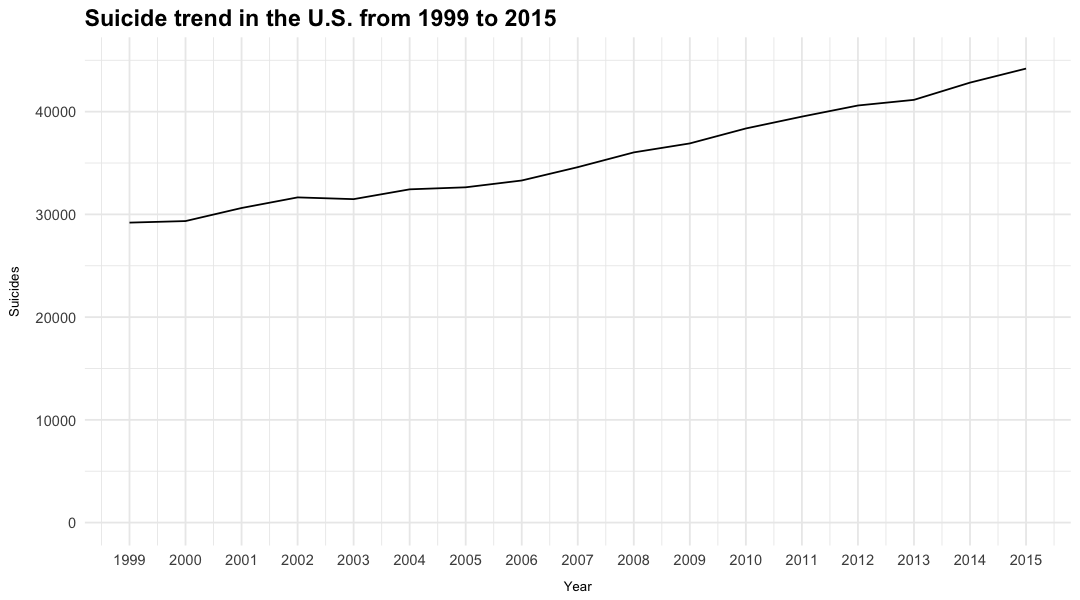

In [4]:
ggplot(suicide_usa, aes(x=Year, y=Deaths)) +
geom_line() +
scale_x_continuous(breaks = seq(1999, 2015, 1)) +
scale_y_continuous(limits = c(0, 45000)) + 
labs(y="Suicides", title="Suicide trend in the U.S. from 1999 to 2015") +
theme_minimal() + 
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0)))

In [5]:
suicide_top10 <- deaths %>% 
    filter(Year == "2015", Cause.Name == "Suicide", Deaths < 44000) %>%
    arrange(desc(Deaths)) %>%
    select (-c(X113.Cause.Name))
head(suicide_top10)

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate
2015,Suicide,California,4167,10.3
2015,Suicide,Texas,3403,12.5
2015,Suicide,Florida,3205,14.4
2015,Suicide,Pennsylvania,1894,14.0
2015,Suicide,New York,1652,7.8
2015,Suicide,Ohio,1650,13.9


In [6]:
population <- read.csv("pop2.csv") %>% 
    filter(Year.id == "est72015", Sex.display.label == "Both Sexes", Hisp.display.label == "Total") %>%
    rename(State=GEO.display.label) %>%
    arrange(desc(totpop)) %>%
    select (-c(GEO.id2, Hisp.id, Year.display.label, Sex.id, Sex.display.label, Hisp.display.label, GEO.id, wa, ba, ia, aa, na, tom))
head(population)

Year.id,State,totpop
est72015,Michigan,9917715
est72015,Delaware,944076
est72015,New Jersey,8935421
est72015,South Dakota,857919
est72015,Virginia,8367587
est72015,North Dakota,756835


In [7]:
suicide_percents <- suicide_top10 %>% 
    inner_join(population, by="State") %>% mutate(
    population = as.numeric(as.character(totpop)),
    suicide_per_100K = ((Deaths/population)*100000)
) %>%
arrange(desc(suicide_per_100K)) %>%
filter(suicide_per_100K > 19.35)
suicide_percents

Warning message:
“Column `State` joining factors with different levels, coercing to character vector”

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate,Year.id,totpop,population,suicide_per_100K
2015,Suicide,Alaska,201,26.9,est72015,737709,737709,27.24652
2015,Suicide,Wyoming,157,28.0,est72015,586555,586555,26.76646
2015,Suicide,Montana,272,25.3,est72015,1032073,1032073,26.35472
2015,Suicide,New Mexico,500,23.7,est72015,2080328,2080328,24.03467
2015,Suicide,Idaho,359,22.1,est72015,1652828,1652828,21.72035
2015,Suicide,Utah,630,22.4,est72015,2990632,2990632,21.06578
2015,Suicide,Oklahoma,790,20.3,est72015,3907414,3907414,20.21798
2015,Suicide,South Dakota,173,20.4,est72015,857919,857919,20.16507
2015,Suicide,Colorado,1093,19.5,est72015,5448819,5448819,20.05939
2015,Suicide,Arkansas,577,19.1,est72015,2977853,2977853,19.37638


If we plotted the graph of states with the highest absolute number of suicides, nothing surprising would occur. California, Florida, Texas and New York would come up as the top four. Plotting the graph this way would not give much value, because in this case the states' population would be entirely omitted. Therefore, the most suitable solution is the bellow plotted graph, which depicts the most suicidal states taking population into the consideration. In Alaska, the leading suicidal state, 27.25 people per 100.000 population commited suicide in 2015. Following right behind Alaska are Wyoming and Montana. Colorado, holding the ninth place, still went slightly over 20 suicides per 100.000 of its inhabitants.

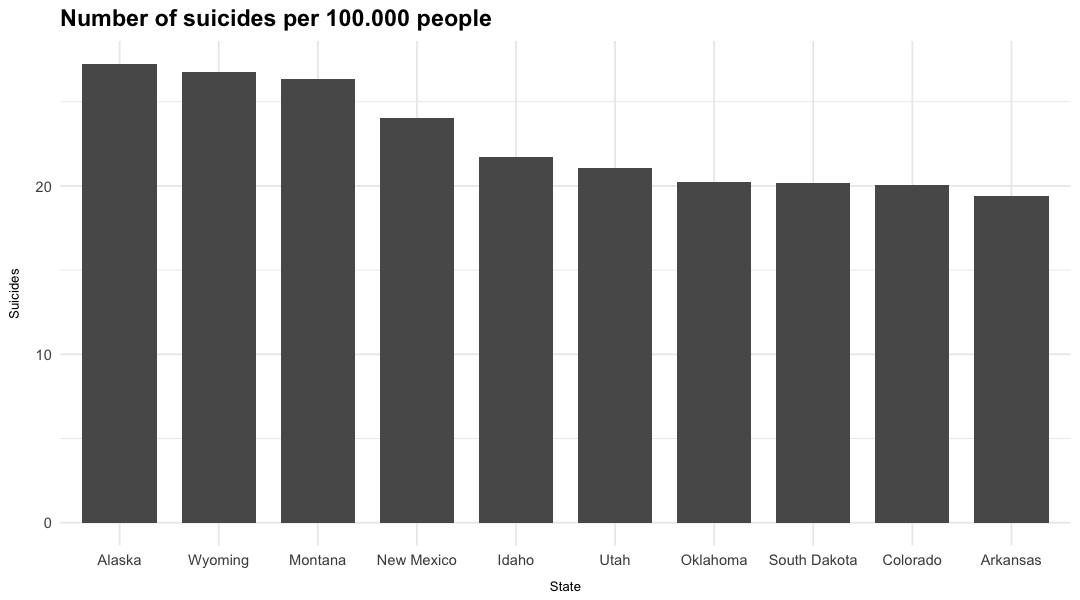

In [8]:
ggplot(suicide_percents, aes(reorder(State, -suicide_per_100K), weight=suicide_per_100K)) +
geom_bar(width=0.75) +
labs(title = "Number of suicides per 100.000 people ", x="State", y="Suicides") +
theme_minimal() +
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0)))

In [9]:
suicide_lattice <- deaths %>% 
    filter(Cause.Name == "Suicide") %>%
    filter(State == "Alaska" | State == "Wyoming" | State == "Montana" | State == "New Mexico" | State == "Idaho" | State == "Utah" | State == "Oklahoma" | State == "South Dakota" | State == "Colorado" | State == "Arkansas") %>%
    arrange(desc(Deaths)) %>%
    select (-c(X113.Cause.Name))
head(suicide_lattice)

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate
2015,Suicide,Colorado,1093,19.5
2014,Suicide,Colorado,1083,19.9
2012,Suicide,Colorado,1052,19.7
2013,Suicide,Colorado,1007,18.6
2009,Suicide,Colorado,941,18.7
2011,Suicide,Colorado,913,17.5


The next graph will reveal how the suicide figures developed in the top ten suicidal states from 1999 to 2015. While, on one hand, Alaska, Idaho, Montana, South Dakota and Wyoming the absolute number of suicides over the years remained almost unchanged, in Arkansas, Oklahoma, Utah and especially Colorado the suicide numbers surged. 

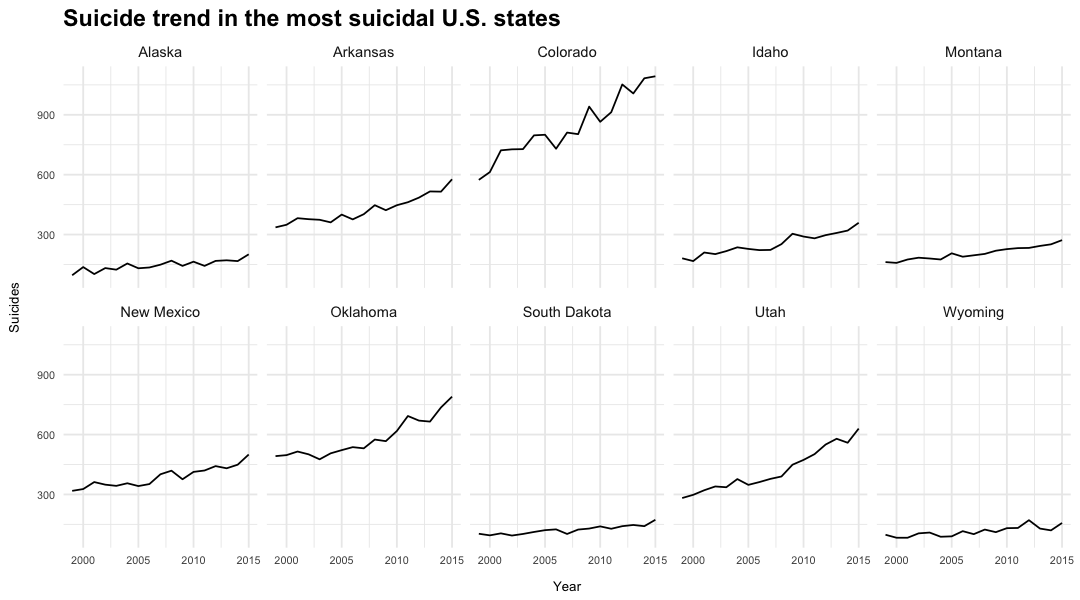

In [10]:
ggplot(suicide_lattice, aes(x=Year, y=Deaths, group=1)) +
geom_line() +
labs(x="Year", y="Suicides", title="Suicide trend in the most suicidal U.S. states") +
facet_wrap(~State, nrow=2, ncol=5) +
theme_minimal() + 
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8), axis.text = element_text(size = 6.5),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0))) 

In [11]:
temperatures <- read.csv("temperatures.csv")

In [12]:
mean(temperatures[["Avg..F"]])

[1] 51.944

In [13]:
suicide_per100k <- suicide_top10 %>% 
    inner_join(population, by="State") %>% mutate(
    population = as.numeric(as.character(totpop)),
    suicide_per_100K = ((Deaths/population)*100000)
) %>%
arrange(desc(suicide_per_100K))
head(suicide_per100k)

Warning message:
“Column `State` joining factors with different levels, coercing to character vector”

Year,Cause.Name,State,Deaths,Age.adjusted.Death.Rate,Year.id,totpop,population,suicide_per_100K
2015,Suicide,Alaska,201,26.9,est72015,737709,737709,27.24652
2015,Suicide,Wyoming,157,28.0,est72015,586555,586555,26.76646
2015,Suicide,Montana,272,25.3,est72015,1032073,1032073,26.35472
2015,Suicide,New Mexico,500,23.7,est72015,2080328,2080328,24.03467
2015,Suicide,Idaho,359,22.1,est72015,1652828,1652828,21.72035
2015,Suicide,Utah,630,22.4,est72015,2990632,2990632,21.06578


In [14]:
suicide_bubble <- temperatures %>% 
    inner_join(suicide_per100k, by="State") 

Warning message:
“Column `State` joining factor and character vector, coercing into character vector”

At the end of our story we may have a look at how suicide rates of different states correlate to the states' average temperatures as well as their populations. A smaller state and a lower average temperature will raise the suicide rate in a particular state. Alaska, Wyoming and Montana, the three most suicidal states, are fairly small by population and they also belong to the coldest states, or to be more precise, states with the lowest average temperature. On the other hand, California, Texas and New York, the leaders in suicides measured by absolute numbers, are evidently the states with the lowest suicide rates. The conclusion drawn out of that might be that the more people there are may result in a more joyful life and less suicides.

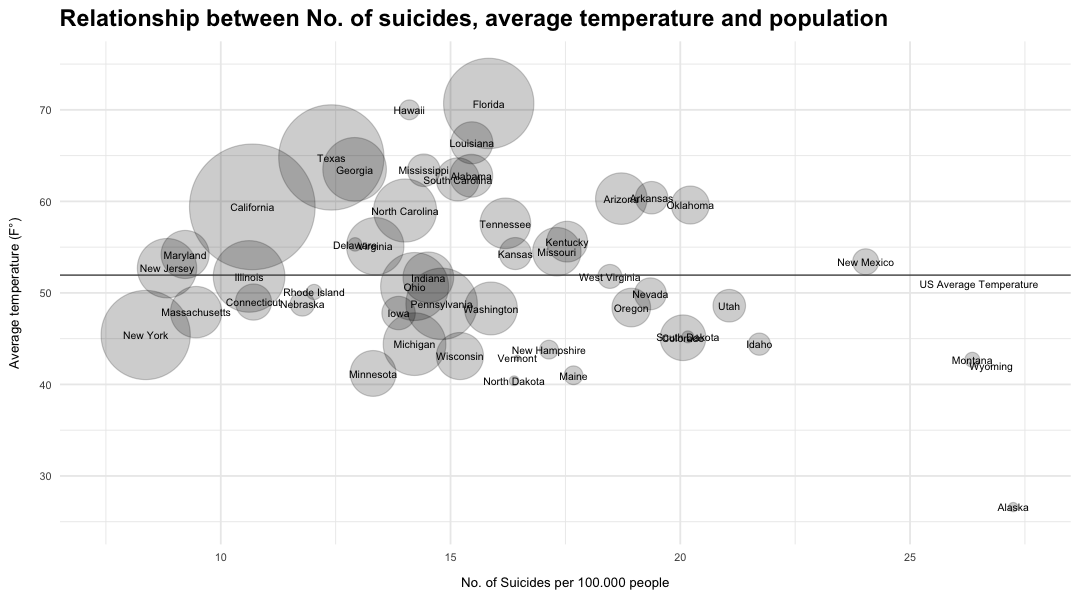

In [15]:
ggplot(suicide_bubble, aes(x = suicide_per_100K, y = Avg..F, size = population, label = State)) +
geom_point(alpha=0.2) +
scale_size_continuous(range=c(0.1, 35)) +
scale_colour_continuous(guide = FALSE) + 
geom_hline(yintercept=51.944, color="grey32", size=.4) +
annotate("text", x=26.5, y=51, label="US Average Temperature", size=2.2) + 
geom_text(size=2.2) + #, check_overlap = TRUE) + 
scale_x_continuous(limits=c(7.5,27.5)) + 
scale_y_continuous(limits=c(25,75)) + 
labs(title="Relationship between No. of suicides, average temperature and population",x="No. of Suicides per 100.000 people", y="Average temperature (F°)", size = "States population") +
theme_minimal() + 
theme(plot.title = element_text(size = 14, face = "bold"), axis.title = element_text(size = 8), axis.text = element_text(size = 6.5),
      axis.title.y = element_text(margin=margin(t = 0, r = 10, b = 0, l = 0)),
      axis.title.x = element_text(margin=margin(t = 10, r = 0, b = 0, l = 0)),
      legend.position = "none", #legend.direction = "horizontal",
      legend.key.size = unit(0.1, "cm"),
      legend.key.width = unit(0.01, "cm"),
      legend.key.height = unit(0.01, "cm"),
      legend.text = element_blank()) 